##Import Library

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/05.%20Week%205/Datasets/netflix_titles.csv"
df = pd.read_csv(url)

df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


##Feature Engineering

In [13]:
# Hapus spasi berlebih sebelum mengubah ke datetime
df['date_added'] = df['date_added'].str.strip()

# Ubah ke datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # gunakan errors='coerce' agar error diubah jadi NaT

# Ekstrak tahun dan bulan
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Ambil country pertama jika ada lebih dari satu
df['main_country'] = df['country'].fillna("Unknown").apply(lambda x: x.split(",")[0].strip())

# Ekstrak angka dan jenis dari kolom duration
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')  # ubah jadi NaN jika gagal

##EDA dan Visualisasi Data

<ipython-input-14-aaec69834217>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


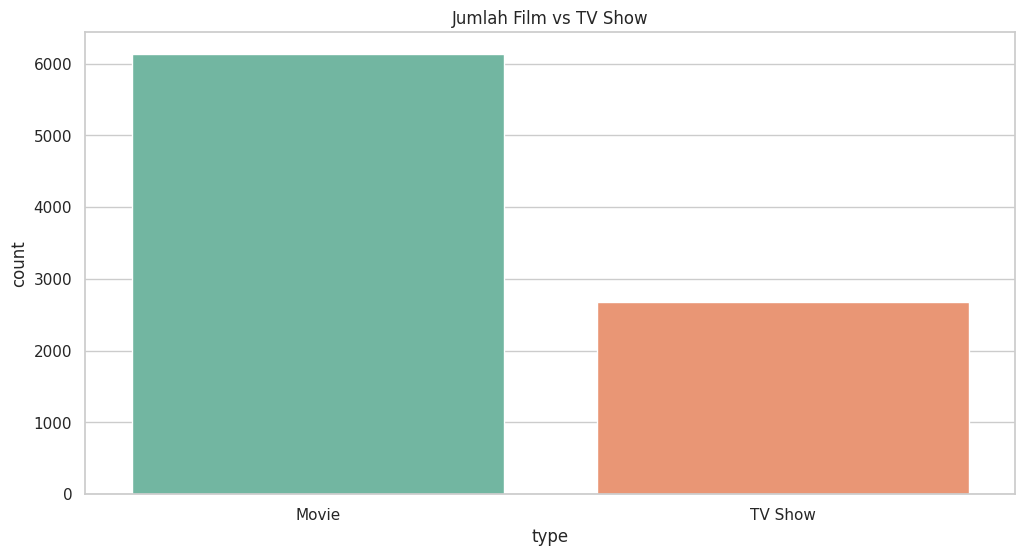

In [14]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Jumlah Film vs TV Show")
plt.show()

<ipython-input-15-570646c1b5be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="rocket")


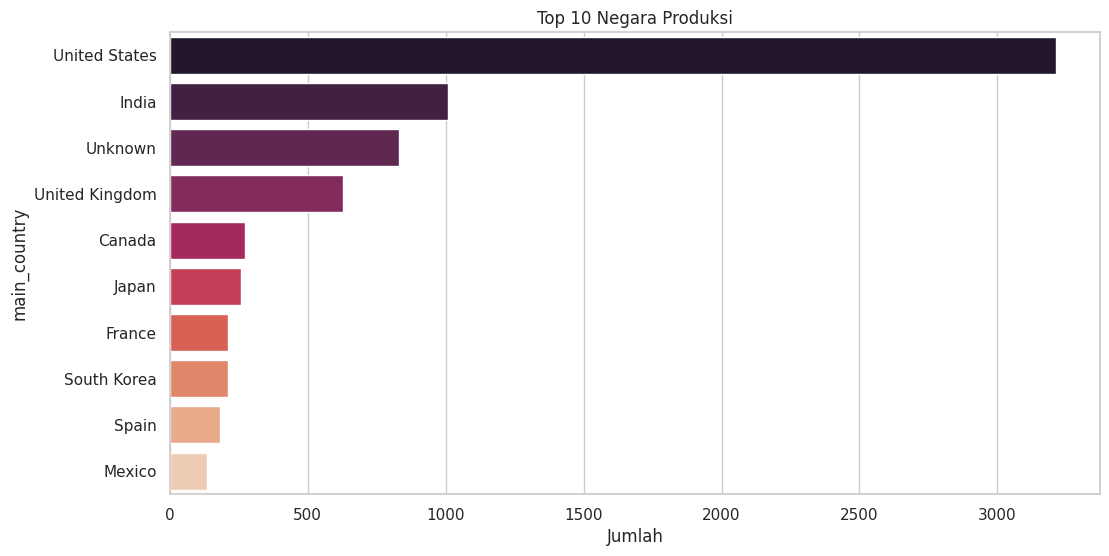

In [15]:
top_countries = df['main_country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="rocket")
plt.title("Top 10 Negara Produksi")
plt.xlabel("Jumlah")
plt.show()

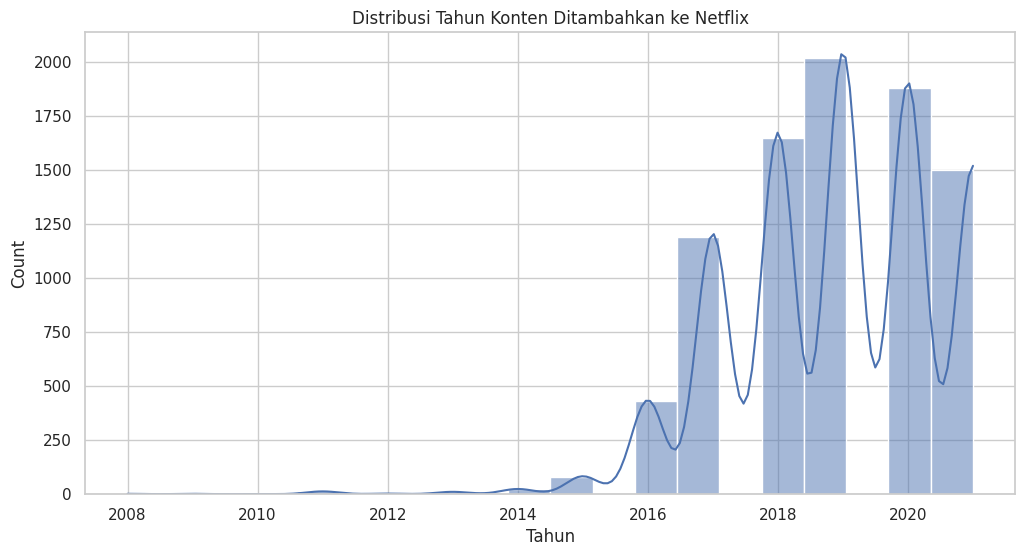

In [16]:
sns.histplot(data=df, x='year_added', bins=20, kde=True)
plt.title("Distribusi Tahun Konten Ditambahkan ke Netflix")
plt.xlabel("Tahun")
plt.show()

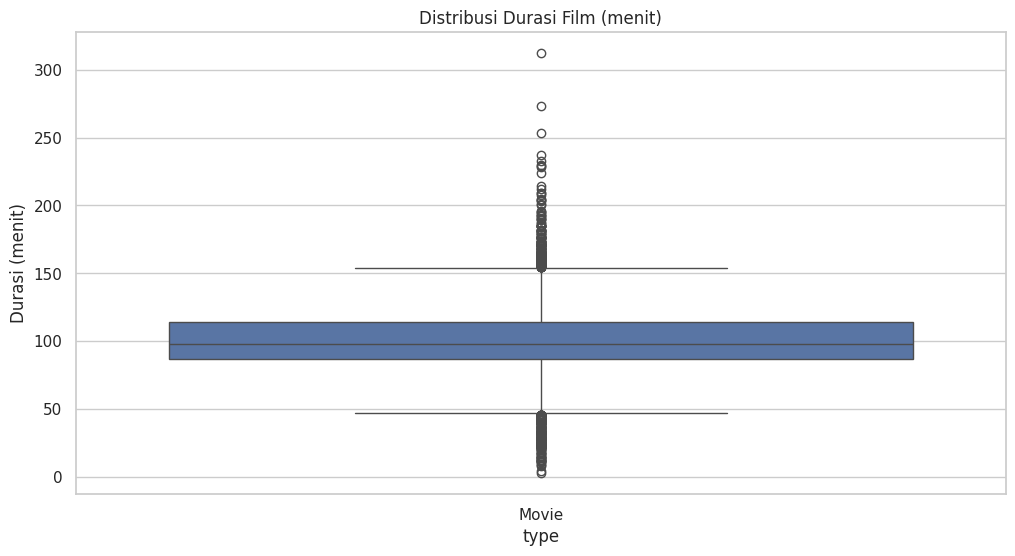

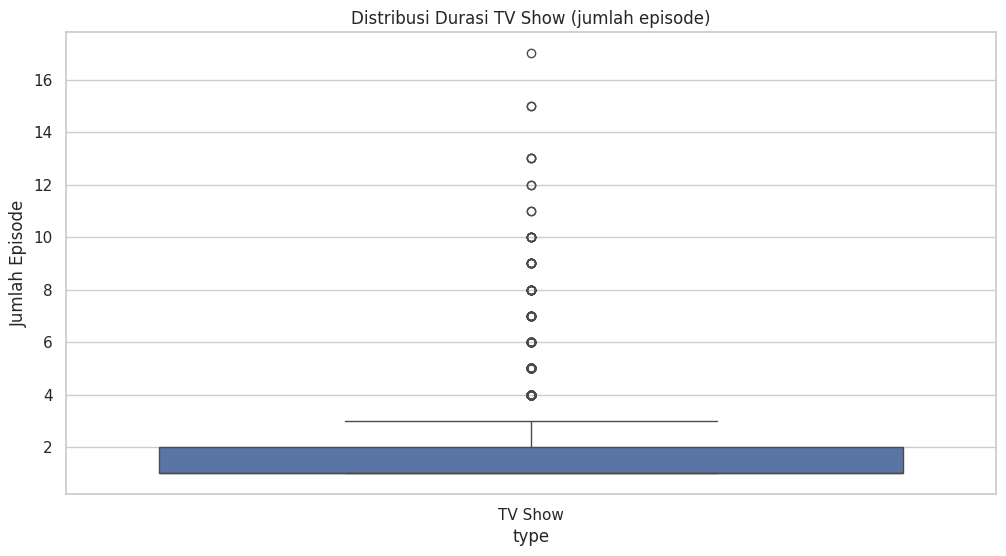

In [17]:
sns.boxplot(data=df[df['type'] == 'Movie'], x='type', y='duration_int')
plt.title("Distribusi Durasi Film (menit)")
plt.ylabel("Durasi (menit)")
plt.show()

sns.boxplot(data=df[df['type'] == 'TV Show'], x='type', y='duration_int')
plt.title("Distribusi Durasi TV Show (jumlah episode)")
plt.ylabel("Jumlah Episode")
plt.show()

##Penjelasan Matematika

### Distribusi Frekuensi
Distribusi digunakan untuk menghitung jumlah kemunculan suatu nilai.

> **f(x) = Jumlah data dengan nilai x**

### Boxplot (Statistik Deskriptif)
- **Q1 (Kuartil 1)** = 25% data  
- **Median (Q2)** = 50% data  
- **Q3 (Kuartil 3)** = 75% data  
- **IQR** = Q3 - Q1  

**Outlier** jika:

> Outlier < Q1 − 1.5 × IQR  
> atau  
> Outlier > Q3 + 1.5 × IQR

### Mean dan Standard Deviation
Jika kamu menghitung rata-rata durasi:

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

Dan **standard deviation**:

$$
\sigma = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2 }
$$
